In [100]:
import skfda
from skfda.inference.anova import oneway_anova
from skfda.representation import FDataGrid
from skfda.datasets import make_gaussian_process

import numpy as np
import matplotlib.pyplot as plt

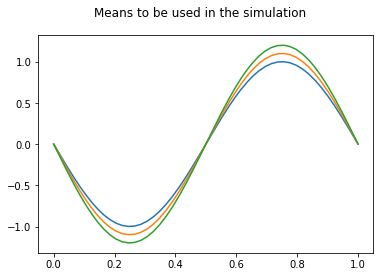

In [101]:
n_samples = 100
n_features = 50
n_groups = 3

t = np.linspace(-np.pi, np.pi, n_features)

m1 = np.sin(t)
m2 = 1.1 * np.sin(t)
m3 = 1.2 * np.sin(t)

_ = FDataGrid([m1, m2, m3], dataset_label="Means to be used in the simulation").plot()

In [102]:
groups = np.full(n_samples * n_groups, 'Sample 1')
groups[100:200] = 'Sample 2'
groups[200:] = 'Sample 3'

In [103]:
def make_process_b_noise(mean, cov, random_state):
    return FDataGrid([mean for _ in range(n_samples)]) + make_gaussian_process(n_samples, n_features=mean.shape[0], cov=cov, random_state=random_state)

In [114]:
sigma = 0.1
cov = np.identity(50) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

stat, p_val = oneway_anova(fd1, fd2, fd3, random_state=1)
stat, p_val

(3.5251341441516106, 0.0)

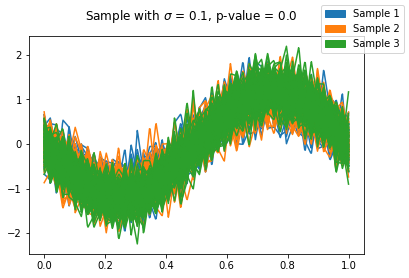

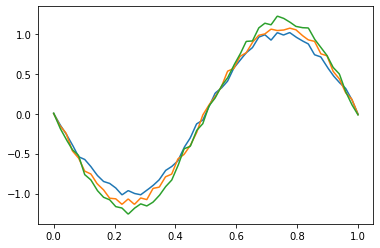

In [115]:
fd = fd1.concatenate(fd2.concatenate(fd3.concatenate()))
fd.dataset_label = f"Sample with $\sigma$ = {sigma}, p-value = {p_val}"
fd.plot(group=groups, legend=True)
_ = fd1.mean().concatenate(fd2.mean().concatenate(fd3.mean()).concatenate()).plot()

In [116]:
sigma = 1
cov = np.identity(50) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

stat, p_val = oneway_anova(fd1, fd2, fd3, random_state=1)
stat, p_val

(9.966812874778942, 0.0195)

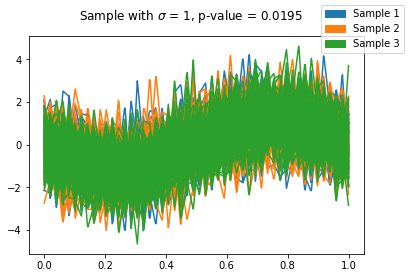

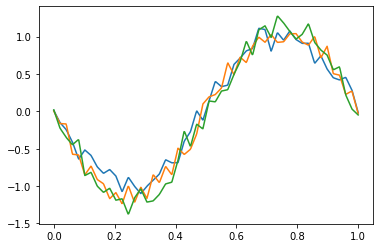

In [117]:
fd = fd1.concatenate(fd2.concatenate(fd3.concatenate()))
fd.dataset_label = f"Sample with $\sigma$ = {sigma}, p-value = {p_val}"
fd.plot(group=groups, legend=True)
_ = fd1.mean().concatenate(fd2.mean().concatenate(fd3.mean()).concatenate()).plot()

In [120]:
sigma = 10
cov = np.identity(50) * sigma

fd1 = make_process_b_noise(m1, cov, random_state=1)
fd2 = make_process_b_noise(m2, cov, random_state=2)
fd3 = make_process_b_noise(m3, cov, random_state=3)

stat, p_val = oneway_anova(fd1, fd2, fd3, random_state=1)
stat, p_val

(78.09942021013121, 0.1415)

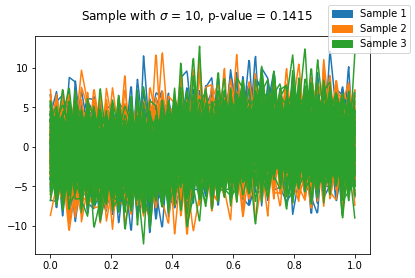

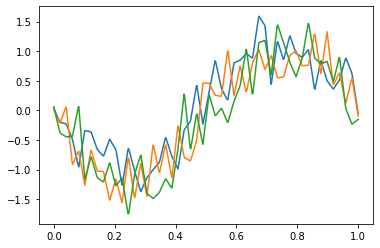

In [121]:
fd = fd1.concatenate(fd2.concatenate(fd3.concatenate()))
fd.dataset_label = f"Sample with $\sigma$ = {sigma}, p-value = {p_val}"
fd.plot(group=groups, legend=True)
_ = fd1.mean().concatenate(fd2.mean().concatenate(fd3.mean()).concatenate()).plot()